# Introduction and Hypothesis
## Hypothesis:
Customer churn (whether a customer cancels their service) can be predicted using charges, and service usage information such as tenure, payment method, monthly charges, and types of services used.

The business goal here would be to build a model that predicts whether a customer will churn or not. This would allow the company to proactively target high-risk customers with retention strategies, potentially reducing churn and improving customer lifetime value.

## 1. Data Fetching and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Overview and Cleaning

In [5]:
# removing the id of the customer, as it doesn't hold any value
data.drop('customerID', axis=1, inplace=True)

In [6]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# total charges should be numeric instead of obj, converting the dtype to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#checking for the NaN values
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# checking the record that has NaN Total charges
data[data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# As we described the data, we can see the minimum tenure is 0, which is unlikely.
# the min should be 1 month before the can leave the service
data[data['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# we will delete those where tenure is 0
data.drop(data[data['tenure'] == 0].index, inplace=True)

In [14]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# the data we had previously with NaN total charges was irrelevant, so it fixed our problem of Nan value too
data[data['tenure'] == 0].sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      0.0
TotalCharges        0.0
Churn                 0
dtype: object

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Exploratory Data Analysis (EDA)

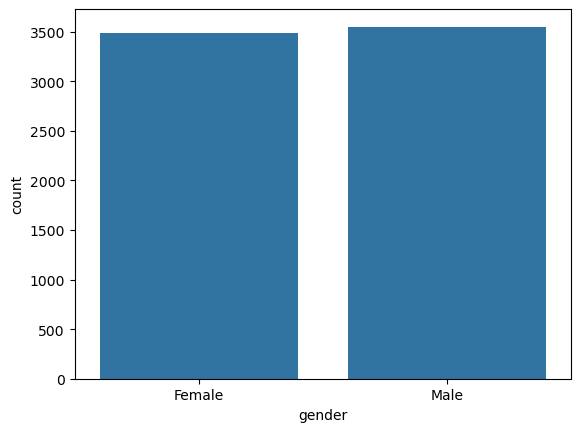

In [17]:
# total count of gender
sns.countplot(x='gender', data=data)
plt.show()

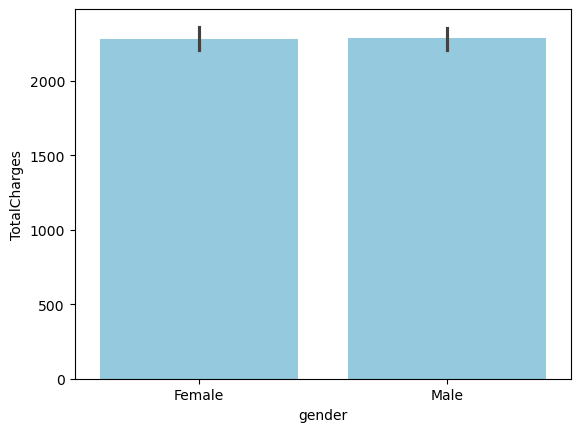

In [18]:
# Average total charges between the gender
sns.barplot(x='gender', y='TotalCharges', data=data, estimator=np.mean, color='skyblue')
plt.show()

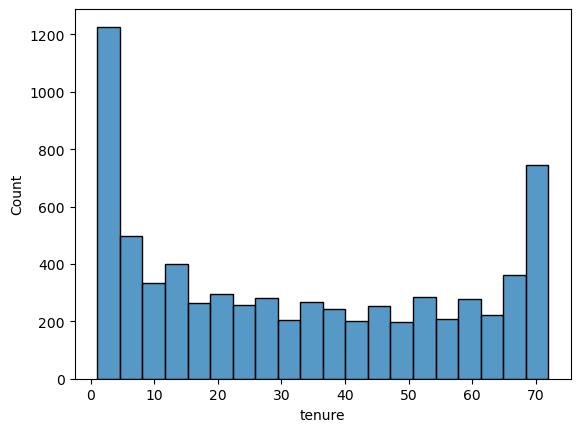

In [19]:
# tenures hist
sns.histplot(data['tenure'], bins=20)
plt.show()

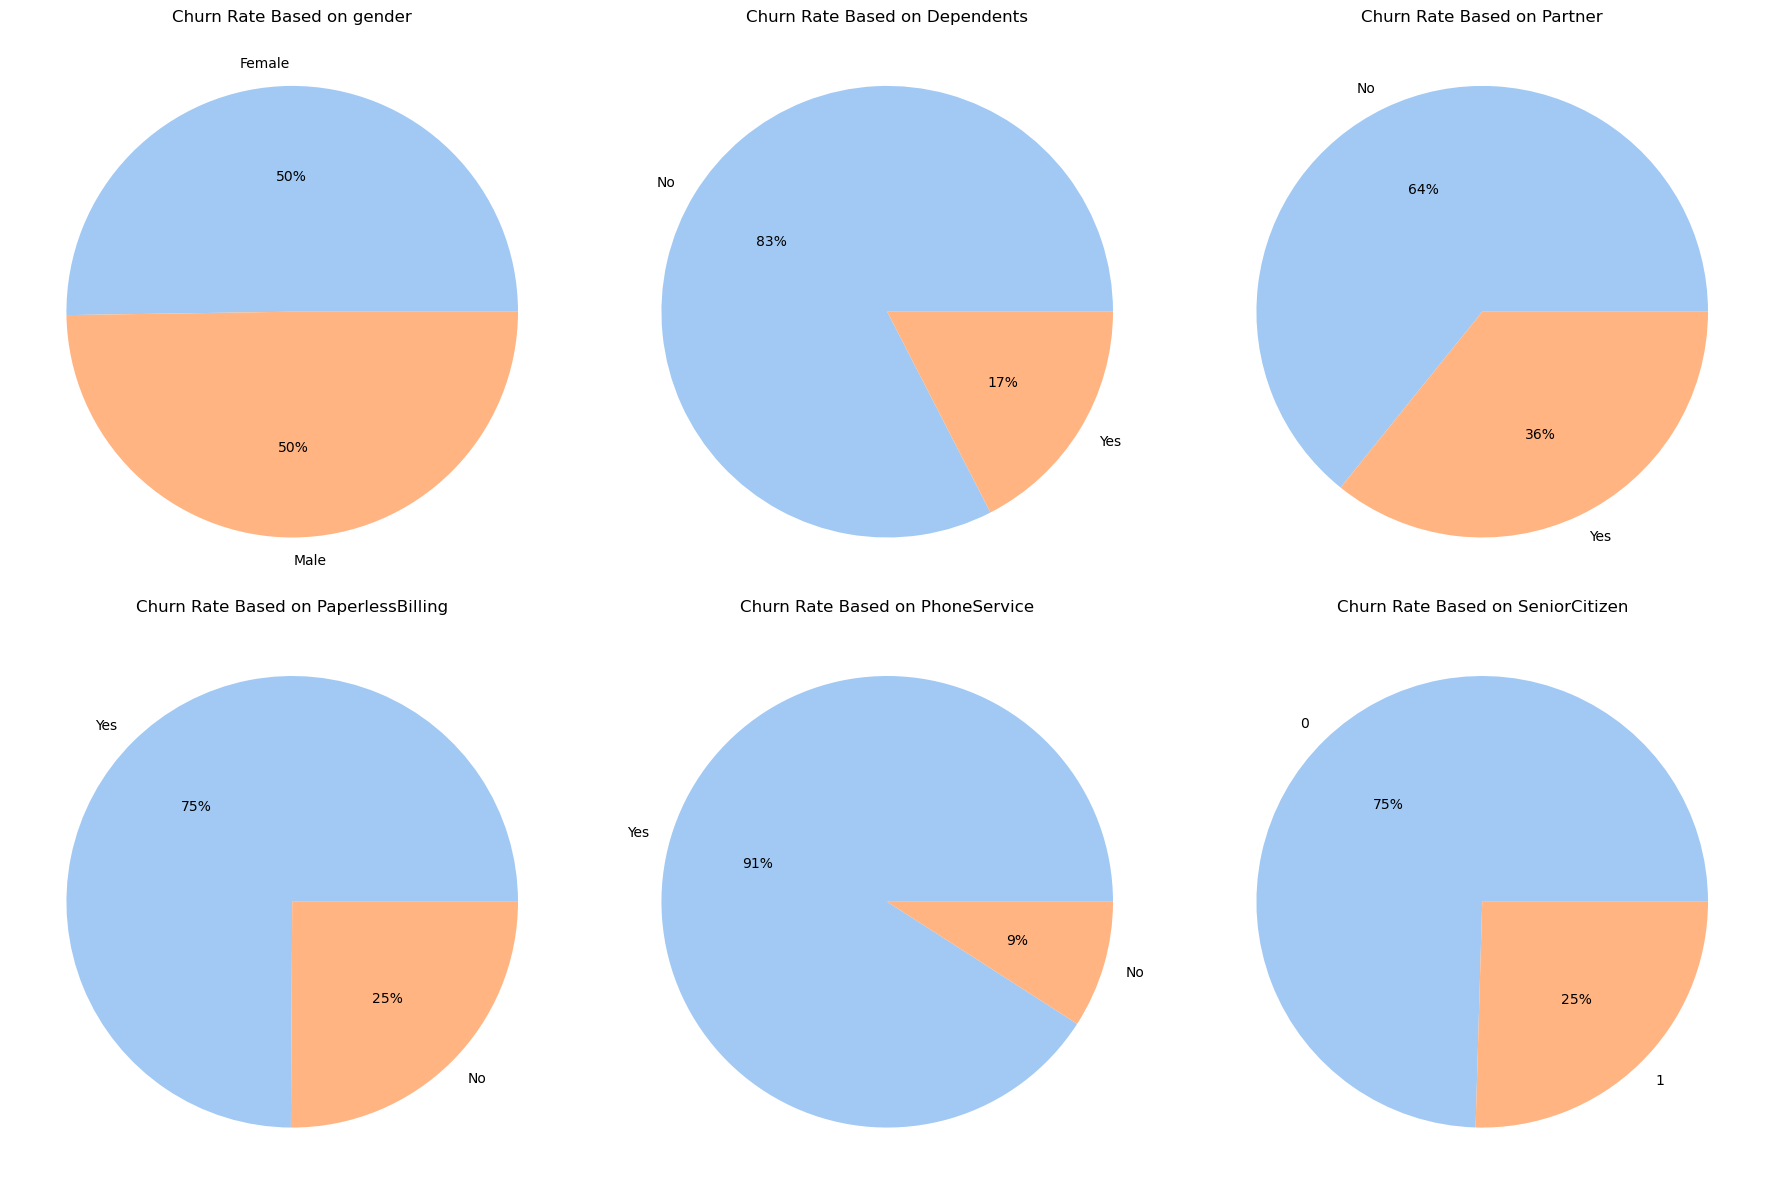

In [20]:
groupBy_cols = ['gender', 'Dependents', 'Partner', 'PaperlessBilling', 'PhoneService', 'SeniorCitizen']
palette_color = sns.color_palette('pastel')


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  

for i, col in enumerate(groupBy_cols):
    
    churn_groupBy = data[data['Churn'] == 'Yes'][col].value_counts()
    
    
    axes[i].pie(
        churn_groupBy, 
        colors=palette_color, 
        autopct='%.0f%%', 
        labels=churn_groupBy.index
    )
    axes[i].set_title(f'Churn Rate Based on {col}')

plt.tight_layout()
plt.show()

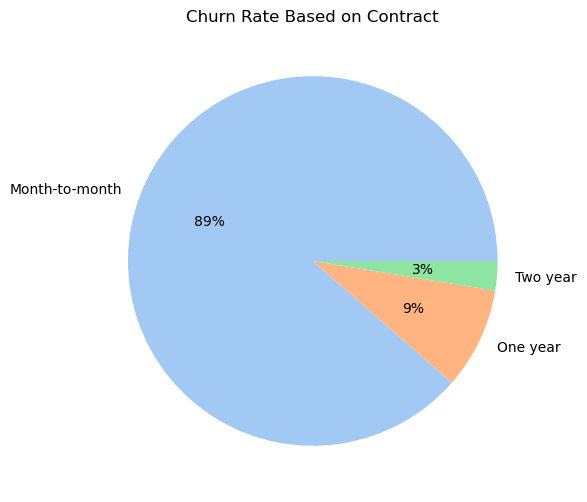

In [21]:
churn_groupBy_contract = data[data['Churn'] == 'Yes']['Contract'].value_counts()
plt.figure(figsize=(8, 6))
palette_color = sns.color_palette('pastel') 
plt.pie(churn_groupBy_contract, colors=palette_color, autopct='%.0f%%',labels=churn_groupBy_contract.index)
plt.title('Churn Rate Based on Contract')
plt.show() 

## 4. Feature Engineering

In [22]:
# # Converting categorical columns to numeric for analysis
columns_to_convert = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling','gender']
colums_to_hotencode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract','StreamingMovies','PaymentMethod']
print("--------Columns to label Encode-----------")
for col in columns_to_convert:
    print(f"{col} => ", data[col].unique())
    
print("\n--------Columns to Hot Encode-----------")
for col in colums_to_hotencode:
    print(f"{col} => ", data[col].unique())

--------Columns to label Encode-----------
Churn =>  ['No' 'Yes']
Partner =>  ['Yes' 'No']
Dependents =>  ['No' 'Yes']
PhoneService =>  ['No' 'Yes']
PaperlessBilling =>  ['Yes' 'No']
gender =>  ['Female' 'Male']

--------Columns to Hot Encode-----------
MultipleLines =>  ['No phone service' 'No' 'Yes']
InternetService =>  ['DSL' 'Fiber optic' 'No']
OnlineSecurity =>  ['No' 'Yes' 'No internet service']
OnlineBackup =>  ['Yes' 'No' 'No internet service']
DeviceProtection =>  ['No' 'Yes' 'No internet service']
TechSupport =>  ['No' 'Yes' 'No internet service']
StreamingTV =>  ['No' 'Yes' 'No internet service']
Contract =>  ['Month-to-month' 'One year' 'Two year']
StreamingMovies =>  ['No' 'Yes' 'No internet service']
PaymentMethod =>  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
# Storing the code for furture analysis and visualization
category_mappings = {}
for col in columns_to_convert:
    category_mappings[col] = dict(enumerate(data[col].astype('category').cat.categories))
    data[col] = data[col].astype('category').cat.codes.astype('int32')

categories = pd.DataFrame(category_mappings)
categories

,Churn,Partner,Dependents,PhoneService,PaperlessBilling,gender
0,No,No,No,No,No,Female
1,Yes,Yes,Yes,Yes,Yes,Male


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   object 
 17  

In [25]:
# one hot encoding
data_encoded = pd.get_dummies(data, columns=colums_to_hotencode, drop_first=True)

In [26]:
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,True,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [27]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int32  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int32  
 3   Dependents                             7032 non-null   int32  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int32  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

In [28]:
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype('int32')

In [29]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int32  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int32  
 3   Dependents                             7032 non-null   int32  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int32  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   int32  
 11  MultipleL

In [30]:
data_encoded['SeniorCitizen'] = data_encoded['SeniorCitizen'].astype('int32') 
data_encoded['tenure'] = data_encoded['tenure'].astype('int32')
data_encoded['MonthlyCharges'] = data_encoded['MonthlyCharges'].astype('float32') 
data_encoded['TotalCharges'] = data_encoded['TotalCharges'].astype('float32')

In [31]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int32  
 1   SeniorCitizen                          7032 non-null   int32  
 2   Partner                                7032 non-null   int32  
 3   Dependents                             7032 non-null   int32  
 4   tenure                                 7032 non-null   int32  
 5   PhoneService                           7032 non-null   int32  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float32
 8   TotalCharges                           7032 non-null   float32
 9   Churn                                  7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   int32  
 11  MultipleL

## 5. Model training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# Separate features and target variable
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X.shape, y.shape

((7032, 30), (7032,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[915 118]
 [181 193]]


## 6. Summary of Findings and Business Implications
### 6.1. Customer Tenure and Churn:
- **Observation:** There is a noticeable peak in churn around the 1-3 month tenure mark, indicating a large number of new customers. As customer tenure increases, churn gradually declines, suggesting a natural drop-off in retention over time. However, smaller peaks at specific tenure intervals may reflect the impact of targeted promotions, seasonal contracts, or other factors that influence retention at those points.
- **Implication:** Early churn, particularly in the first three month, highlights the importance of customer onboarding and engagement strategies to improve retention. Further analysis of the factors behind the smaller churn peaks could help identify opportunities to address specific pain points or capitalize on particular customer segments.
### 6.2. Paperless Billing and Churn:
- **Observation:** Customers using paperless billing tend to have higher churn rates than those who opt for traditional paper billing.
- **Reasoning:** This may suggest that customers who switch to digital billing are more likely to cancel the service if they are dissatisfied, as digital services are often easier to discontinue. Additionally, customers who receive paper bills might feel a stronger connection to the service provider through physical communication, making them less likely to cancel.
- **Implication:** To reduce churn, the company should focus on making the digital billing experience seamless, convenient, and engaging to prevent easy cancellations. Reassessing the user interface and offering clearer value through digital channels could enhance customer satisfaction and loyalty. Additionally, targeting customers who prefer paper billing with tailored retention strategies could help retain this segment.

### 6.3. Phone Service and Churn:
- **Observation:** Customers who have phone services as part of their package tend to experience higher churn rates.
- **Reasoning:** This may reflect the competitive nature of the telecom industry, where customers have numerous options and can easily switch providers for better deals or services. It could also point to dissatisfaction with the quality or value of the phone service itself.
- **Implication:** The company might consider reviewing its phone service offerings, looking for ways to differentiate itself in the market, such as bundling with other high-demand services, improving service quality, or introducing flexible pricing plans to better meet customer expectations.
### 6.4. Contract Type and Churn:
- **Observation:** Customers on month-to-month contracts are more likely to churn compared to those on one-year or two-year contracts.
- **Reasoning:** Month-to-month contracts tend to attract customers who are more likely to be price-sensitive or unsure about their long-term needs. These customers might be quicker to leave if they find a better deal elsewhere. In contrast, customers on longer-term contracts have more invested in their provider (both financially and contractually) and might be less inclined to switch, especially if penalties for early termination exist.
  
- **Implication:** To reduce churn, the company could offer incentives for customers to sign longer-term contracts, such as discounts or value-added services. Alternatively, providing more flexible month-to-month plans with perks like loyalty rewards or lower early termination fees could make short-term contracts less prone to churn.

### 6.5 Summary

- **Enhance service quality and differentiation for phone services**, possibly through bundling with other popular services.
- **Improve the digital billing experience** to address potential dissatisfaction with paperless billing.
- **Offer incentives** for longer-term contracts or introduce more attractive, flexible plans for month-to-month customers.
- **Focus on customer engagement** and value to reduce the churn of tech-savvy customers who may lean toward paperless billing.
